Which brand has had the most Super Bowl commercials? Do they have a distinct style?

How have different characteristics for commercials trended across time?

Can you identify any patterns for the most successful commercials on YouTube?

Which characteristics are paired most often? Can you find any unusual combinations?

dataset from mavenanalytics

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('superbowl_commercials.csv')

In [3]:
df.head()

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,https://superbowl-ads.com/2000-etrade-money-ou...,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaas...,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,https://superbowl-ads.com/2000-bud-light-hold-...,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-talki...,https://www.youtube.com/watch?v=dK1tlG778J8,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


In [7]:
df.shape

(249, 16)

fields description

Year-Year the spot aired, according to superbowl-ads.com

Brand-Brand of advertiser

Superbowl Ads Link-Link to superbowl-ads.com entry for this ad

YouTube Link-Link to a YouTube video for this ad (if this field is blank, it means no YouTube video was found)

Funny-Was it trying to be funny? Is the ad jokey, goofy, weird or silly? Funny commercials (or ones that are trying to be funny) are marked TRUE. Anything serious or dramatic is marked FALSE.

Shows Product Quickly-Did it show the product right away? Can you tell what is being advertised within the first 10 seconds of the commercial? If you can see the product or brand name on the screen, that counts.

Patriotic-Was it patriotic? Did the commercial make a patriotic appeal, either clear or subtle, or include American imagery? Any glimpses of an American flag or the words "America" or "United States" counted, as did references to the armed forces, manufacturing and farming.

Celebrity-Did it feature a celebrity? If we saw a celebrity we recognized, we checked this one off.

Danger-Did it involve danger? Did we see any violence, threats of violence, injuries, fighting or guns? Any allusions to death or hokey injuries also counted here.

Animals-Did it include animals? Did an animal — either real or computer-generated — show up at any point in the ad? Even one-frame appearances counted.

Uses Sex-Did it use sex to sell its product? We counted any subtle or overt suggestions of sex, sexuality, sex appeal or nudity.

Length-Runtime for the ad, in seconds

Estimated Cost-Estimated cost of the TV spot for the ad, in millions of dollars, based on length and the cost of a 30 second ad that year, according to gobankingrates.com

YouTube Views-YouTube view count as of 2022-01-11 for the video in the link provided

YouTube Likes-YouTube likes as of 2022-01-11 for the video in the link provided

TV Viewers-Millions of television viewers for the corresponding Super Bowl, according to sportsmediawatch.com

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Brand                  249 non-null    object 
 2   Superbowl Ads Link     249 non-null    object 
 3   Youtube Link           240 non-null    object 
 4   Funny                  249 non-null    bool   
 5   Shows Product Quickly  249 non-null    bool   
 6   Patriotic              249 non-null    bool   
 7   Celebrity              249 non-null    bool   
 8   Danger                 249 non-null    bool   
 9   Animals                249 non-null    bool   
 10  Uses Sex               249 non-null    bool   
 11  Length                 249 non-null    int64  
 12  Estimated Cost         249 non-null    float64
 13  Youtube Views          237 non-null    float64
 14  Youtube Likes          231 non-null    float64
 15  TV Vie

In [17]:
df['Youtube Link'].fillna('Missing data',inplace=True)
df['Youtube Views'].fillna(df['Youtube Views'].mean(),inplace=True)
df['Youtube Likes'].fillna(df['Youtube Likes'].mean(),inplace=True)
#handling missing data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Brand                  249 non-null    object 
 2   Superbowl Ads Link     249 non-null    object 
 3   Youtube Link           249 non-null    object 
 4   Funny                  249 non-null    bool   
 5   Shows Product Quickly  249 non-null    bool   
 6   Patriotic              249 non-null    bool   
 7   Celebrity              249 non-null    bool   
 8   Danger                 249 non-null    bool   
 9   Animals                249 non-null    bool   
 10  Uses Sex               249 non-null    bool   
 11  Length                 249 non-null    int64  
 12  Estimated Cost         249 non-null    float64
 13  Youtube Views          249 non-null    float64
 14  Youtube Likes          249 non-null    float64
 15  TV Vie

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe()

,Year,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
count,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.000000
mean,2010.469880,44.457831,5.156888,1.569672e+06,5086.592713,100.475341
std,6.002024,21.331845,4.075974,1.199796e+07,27337.998617,12.819811
min,2000.000000,10.000000,0.980000,5.000000e+00,0.000000,84.340000
25%,2006.000000,30.000000,2.400000,8.062000e+03,28.000000,90.750000
50%,2010.000000,30.000000,3.150000,5.860600e+04,185.000000,98.730000
75%,2015.000000,60.000000,5.900000,2.270920e+05,1200.000000,111.010000
max,2021.000000,180.000000,31.730000,1.814238e+08,295000.000000,232.000000


Which brand has had the most Super Bowl commercials? Do they have a distinct style?

In [28]:
df['Brand'].value_counts().sort_values(ascending=False)

Bud Light    62
Budweiser    43
Doritos      26
Pepsi        25
Hyundai      22
Coca-Cola    21
E-Trade      14
Kia          13
Toyota       12
NFL          11
Name: Brand, dtype: int64

Bud Lighter has the most number of superbowl commercials

In [29]:
df_brand_bud_lighter=df[df['Brand']=='Bud Light']

In [32]:
df_brand_bud_lighter_characteristics=df_brand_bud_lighter.iloc[:,4:11]

In [64]:
for i in df_brand_bud_lighter_characteristics.columns:
    print(df_brand_bud_lighter_characteristics[i].value_counts())

True     59
False     3
Name: Funny, dtype: int64
True     51
False    11
Name: Shows Product Quickly, dtype: int64
False    59
True      3
Name: Patriotic, dtype: int64
False    47
True     15
Name: Celebrity, dtype: int64
False    33
True     29
Name: Danger, dtype: int64
False    41
True     21
Name: Animals, dtype: int64
False    38
True     24
Name: Uses Sex, dtype: int64


Bud Lighter adds focus on the characteristics Funny,Showing Product Quickly,Patriotism and Celebrities

How have different characteristics for commercials trended across time?

In [49]:
import numpy as np

In [75]:
dfg=df.groupby('Year').agg({'Funny':'value_counts','Shows Product Quickly':'value_counts','Patriotic':'value_counts','Celebrity':'value_counts','Danger':'value_counts','Animals':'value_counts','Uses Sex':'value_counts'})

In [76]:
dfg.shape

(44, 7)

In [77]:
dfg.head(22)

Funny  Shows Product Quickly  Patriotic  Celebrity  Danger  \
Year                                                                     
2000 False    NaN                      3        8.0        8.0       4   
     True     8.0                      5        NaN        NaN       4   
2001 False    3.0                      9       12.0        7.0       9   
     True    10.0                      4        1.0        6.0       4   
2002 False    2.0                      3        9.0        8.0       6   
     True     8.0                      7        1.0        2.0       4   
2003 False    1.0                      2       12.0       10.0      10   
     True    11.0                     10        NaN        2.0       2   
2004 False    1.0                      4       10.0        9.0       7   
     True    10.0                      7        1.0        2.0       4   
2005 False    NaN                      3        8.0        5.0       7   
     True     8.0                      5        NaN        3.0       1   
2006 False    NaN                      2        7.0        5.0       4   
     True     7.0                      5        NaN        2.0       3   
2007 False    5.0                      3       12.0       12.0       8   
     True     9.0                     11        2.0        2.0       6   
2008 False    2.0                      2       10.0        8.0       9   
     True    11.0                     11        3.0        5.0       4   
2009 False    4.0                      3       12.0       13.0       8   
     True    11.0                     12        3.0        2.0       7   
2010 False    3.0                      5       11.0       12.0      11   
     True    11.0                      9        3.0        2.0       3   

            Animals  Uses Sex  
Year                           
2000 False        4       7.0  
     True         4       1.0  
2001 False       10       7.0  
     True         3       6.0  
2002 False        7       4.0  
     True         3       6.0  
2003 False        9       8.0  
     True         3       4.0  
2004 False        5       7.0  
     True         6       4.0  
2005 False        5       3.0  
     True         3       5.0  
2006 False        5       5.0  
     True         2       2.0  
2007 False        9      11.0  
     True         5       3.0  
2008 False       10       9.0  
     True         3       4.0  
2009 False       10      13.0  
     True         5       2.0  
2010 False       11      11.0  
     True         3       3.0

In [78]:
dfg.fillna(0,inplace=True)

In [79]:
dfg=dfg.reset_index()

In [129]:
dfg.head()

,Year,level_1,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex
0,2000,False,0.0,3,8.0,8.0,4,4,7.0
1,2000,True,8.0,5,0.0,0.0,4,4,1.0
2,2001,False,3.0,9,12.0,7.0,9,10,7.0
3,2001,True,10.0,4,1.0,6.0,4,3,6.0
4,2002,False,2.0,3,9.0,8.0,6,7,4.0


In [82]:
import seaborn as sns

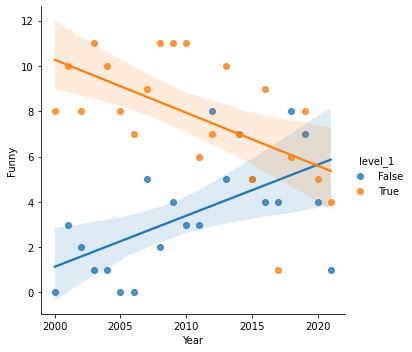

In [92]:
sns.lmplot(x='Year',y='Funny',hue='level_1',data=dfg)

The useage of Funny in superbowl commercials has decreased over the years

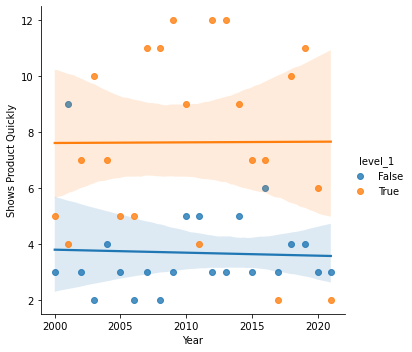

In [93]:
sns.lmplot(x='Year',y='Shows Product Quickly',hue='level_1',data=dfg)

The pattern of showing product quickly has not been consistent over the years in superbowl commercials 

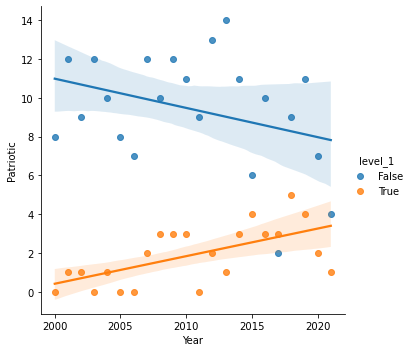

In [97]:
sns.lmplot(x='Year',y='Patriotic',hue='level_1',data=dfg)

The useage of Patriotism in superbowl commercials has increased over the years

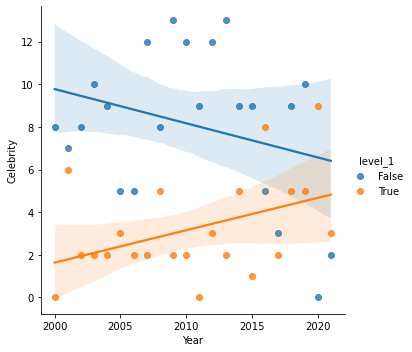

In [99]:
sns.lmplot(x='Year',y='Celebrity',hue='level_1',data=dfg)

The useage of Celebrities in superbowl commercials has increased over the years

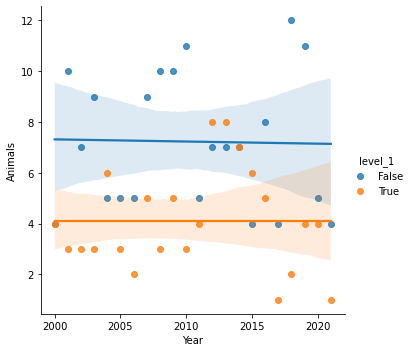

In [104]:
sns.lmplot(x='Year',y='Animals',hue='level_1',data=dfg)

The useage of Animals has not been consistent over the years in superbowl commercials 

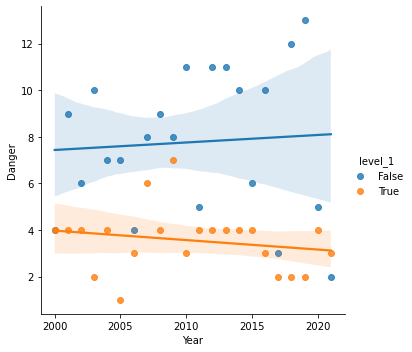

In [105]:
sns.lmplot(x='Year',y='Danger',hue='level_1',data=dfg)

The useage of Danger has not been consistent over the years in superbowl commercials 

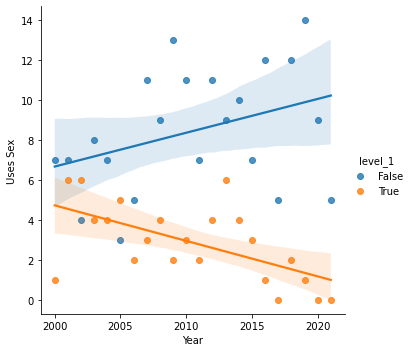

In [107]:
sns.lmplot(x='Year',y='Uses Sex',hue='level_1',data=dfg)

The useage of charatersistic 'Uses Sex' in superbowl commercials has decreased over the years

Can you identify any patterns for the most successful commercials on YouTube?


In [135]:
df_youtube_sucessful=df.iloc[:,3:15]

In [136]:
df_youtube_sucessful.columns

Index(['Youtube Link', 'Funny', 'Shows Product Quickly', 'Patriotic',
       'Celebrity', 'Danger', 'Animals', 'Uses Sex', 'Length',
       'Estimated Cost', 'Youtube Views', 'Youtube Likes'],
      dtype='object')

In [137]:
df_youtube_sucessful=df_youtube_sucessful.sort_values(by=['Youtube Views'],ascending=False)

top ten percent most sucessful youtube commercials on basis of total views

In [238]:
top_ten_youtube_sucessful_commercials=df_youtube_sucessful.iloc[0:25,1:8]

Text(0, 0.5, 'Count')

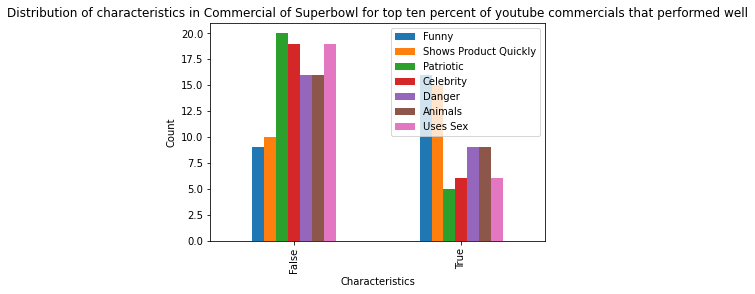

In [265]:
top_ten_youtube_sucessful_commercials.apply(pd.value_counts).plot(kind='bar', 
                                     title='Distribution of characteristics in Commercial of Superbowl for top ten percent of youtube commercials that performed well')
plt.xlabel('Characteristics')
plt.ylabel('Count')

 top ten percent of Superbowl commercials that performed well on youtube are funny and display product of commercial quickly

In [155]:
top_ten_youtube_sucessful_commercials.describe()

,Length,Estimated Cost,Youtube Views,Youtube Likes
count,25.000000,25.000000,2.500000e+01,25.000000
mean,57.200000,8.021200,1.421782e+07,44070.637085
std,38.353618,7.565909,3.607464e+07,77069.340512
min,30.000000,2.100000,1.569672e+06,2500.000000
25%,30.000000,2.950000,1.569672e+06,5086.592713
50%,60.000000,4.250000,2.137823e+06,5086.592713
75%,60.000000,10.400000,8.087637e+06,31000.000000
max,180.000000,31.730000,1.814238e+08,295000.000000


In [161]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Lenght in seconds of top ten percent superbowl commercials box plot')

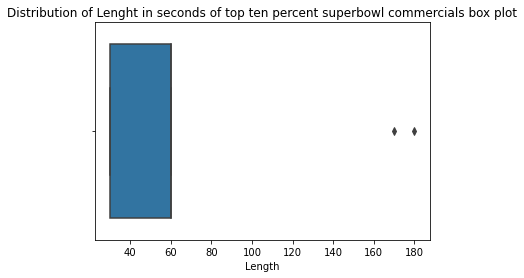

In [164]:
sns.boxplot(x='Length',data=top_ten_youtube_sucessful_commercials)
plt.title('Distribution of Lenght in seconds of top ten percent superbowl commercials box plot')

75% of The top ten percent of most sucessful youtube commercials in terms of total views for superbowl have length of 60 seconds

Which characteristics are paired most often? Can you find any unusual combinations?

In [254]:
y=df.groupby(['Funny', 'Shows Product Quickly', 'Patriotic',
       'Celebrity', 'Danger', 'Animals','Uses Sex']).size().sort_values(ascending=False)

In [261]:
y.head(10)

Funny  Shows Product Quickly  Patriotic  Celebrity  Danger  Animals  Uses Sex
True   True                   False      False      False   False    False       23
                                                    True    False    False       16
                                                            True     False       11
False  True                   False      False      False   False    False       11
True   True                   False      False      False   True     False       10
False  True                   True       False      False   True     False        9
True   False                  False      False      False   False    False        9
False  False                  False      True       False   False    False        8
True   True                   False      False      False   False    True         8
                                         True       False   False    False        8
dtype: int64